# Blinkit Analysis

Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing The Dataset

In [3]:
df = pd.read_csv('blinkit_data.csv')

Getting Basic Information

In [4]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [12]:
df.shape

(8523, 12)

In [14]:
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Data Cleaning

In [28]:
df['Outlet Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT046', 'OUT013', 'OUT045', 'OUT017',
       'OUT010', 'OUT027', 'OUT035', 'OUT019'], dtype=object)

In [17]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'reg': 'Regular','low fat':'Low Fat'})

In [19]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [127]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
Quadrant                        0
dtype: int64

In [128]:
df.groupby('Item Type')['Item Weight'].median()

Item Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.150
Household                13.150
Meat                     12.350
Others                   14.500
Seafood                  11.650
Snack Foods              13.150
Soft Drinks              11.800
Starchy Foods            13.175
Name: Item Weight, dtype: float64

In [130]:
df['Item Weight'] = df.groupby('Item Type')['Item Weight'].transform(
    lambda x: x.fillna(x.median()))
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
Quadrant                     0
dtype: int64

Setting Basic KPI'S

In [50]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
average_sales = df['Sales'].mean()

# Total Items Sold
total_items_sold = df['Item Identifier'].count()

# Unique Items
unique_items = df['Item Identifier'].nunique()

# Unique Item Categories
unique_item_categories = df['Item Type'].nunique()

# Total Stores
total_stores = df['Outlet Identifier'].nunique()

# Average Rating
average_rating = df['Rating'].mean()

In [51]:
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${average_sales:,.2f}")
print(f"Total Items Sold: {total_items_sold}")
print(f"Unique Item Categories: {unique_item_categories}")
print(f"No of Unique Items: {unique_items}")
print(f"Total Stores: {total_stores}")
print(f"Average Rating: {average_rating:.2f}")

Total Sales: $1,201,681.48
Average Sales: $140.99
Total Items Sold: 8523
Unique Item Categories: 16
No of Unique Items: 1559
Total Stores: 10
Average Rating: 3.97


# Data Analysis

Top 10 Selling Items

In [78]:
top_items_sales = df.groupby(['Item Identifier','Item Type'])['Sales'].sum().reset_index()
top_10items_sales = top_items_sales.sort_values(by='Sales', ascending=False).head(10)

print(top_10items_sales)

     Item Identifier              Item Type      Sales
976            FDU12           Baking Goods  2371.0112
921            FDT07  Fruits and Vegetables  2306.8970
1454           NCQ06              Household  2294.7126
616            FDL58            Snack Foods  2111.6544
1279           NCB31              Household  2104.7280
1141           FDX31  Fruits and Vegetables  2104.4622
359            FDF05           Frozen Foods  2103.1280
866            FDR59                 Breads  2096.5752
753            FDP28           Frozen Foods  2087.8488
148            FDA04           Frozen Foods  2072.0696


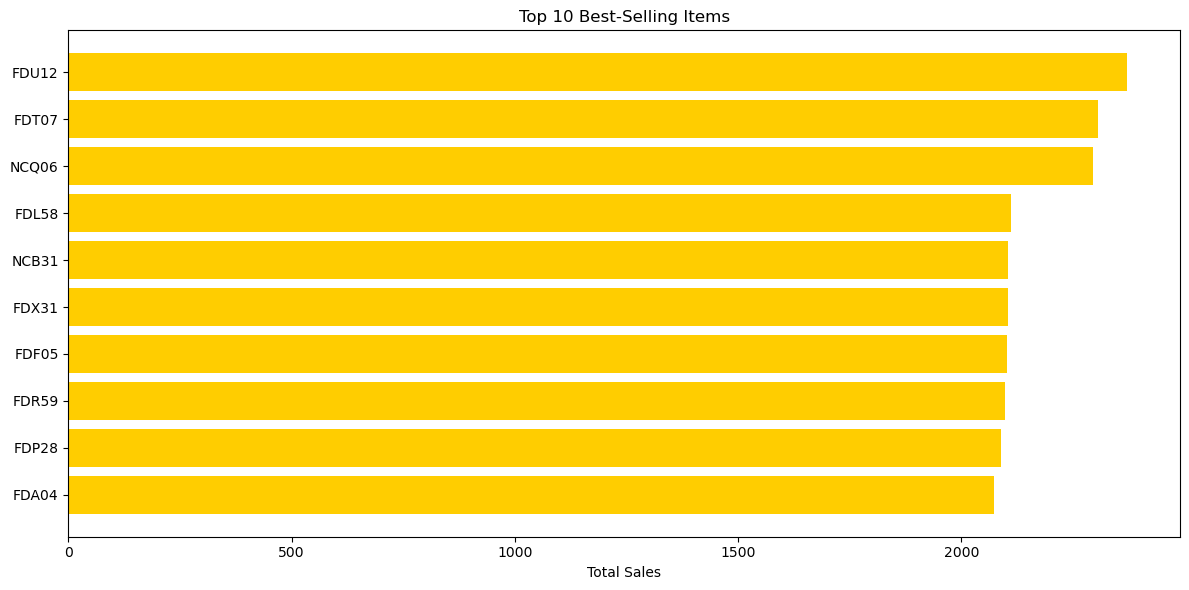

In [ ]:
top_10items_sales = top_10items_sales.sort_values(by='Sales')

plt.figure(figsize=(12, 6))

plt.barh(top_10items_sales['Item Identifier'], top_10items_sales['Sales'], color='#ffcd00')
plt.xlabel('Total Sales')
plt.title('Top 10 Best-Selling Items')
plt.tight_layout()
plt.show()

Sales By Item Fat Content & Item Type

In [83]:
grouped1 = df.groupby(['Item Type','Item Fat Content'])['Sales'].sum().reset_index()

pivot1 = grouped1.pivot(index = 'Item Type', columns = 'Item Fat Content', values = 'Sales')

<Figure size 1600x2000 with 0 Axes>

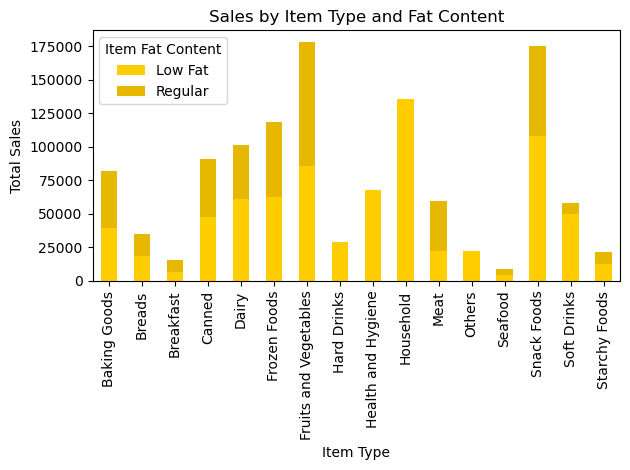

In [90]:
plt.figure(figsize=(16, 20))

pivot1.plot(kind = 'bar', stacked = True,  color = ['#ffcd00', '#e6b800'])

plt.title('Sales by Item Type and Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

Sales By Fat Content

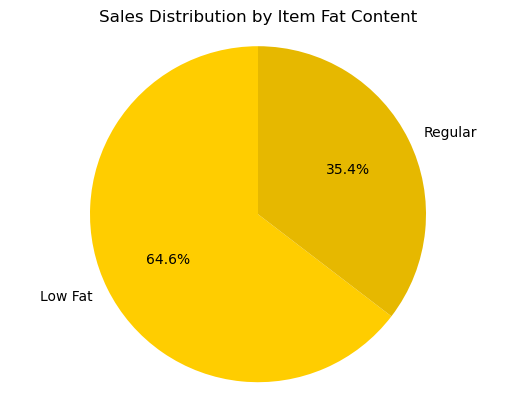

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum().reset_index() 

colors = ['#ffcd00', '#e6b800', '#cc9900'] # Yellow Shades

plt.pie(sales_by_fat['Sales'],
        labels = sales_by_fat['Item Fat Content'],
        autopct = '%.1f%%',
        startangle = 90,
        colors = colors)

plt.title('Sales Distribution by Item Fat Content')
plt.axis('equal')
plt.show()      

In [36]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Sales By Item Type

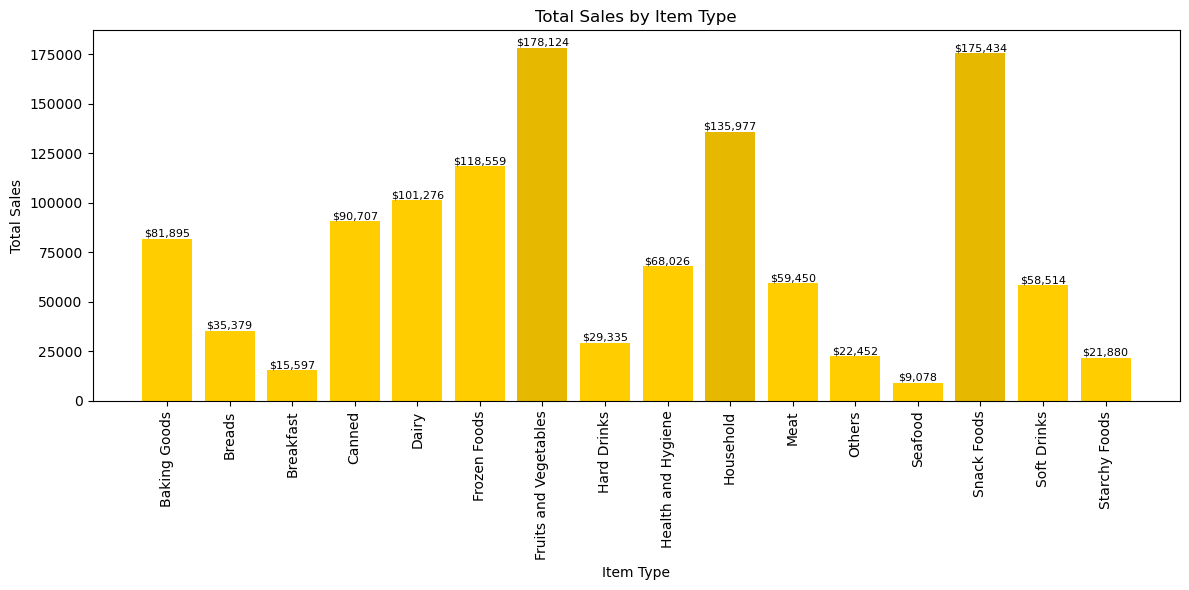

In [ ]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().reset_index()
sales_by_type = sales_by_type.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))

# Top 3 Items in different Shades of Yellow
colors = ['#e6b800' if i < 3 else '#ffcd00' for i in range(len(sales_by_type))]

bars = plt.bar(sales_by_type.index, sales_by_type['Sales'], color = colors)

plt.xticks(sales_by_type.index, sales_by_type['Item Type'], rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.0f}', ha='center', va='bottom',fontsize = 8)

plt.tight_layout()
plt.show()

Sales By Outlet Location Type

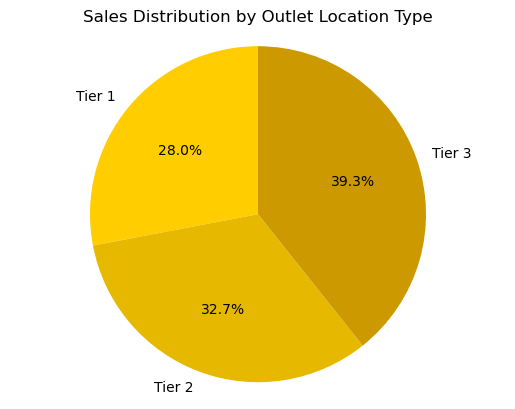

In [56]:
sales_by_location_type = df.groupby('Outlet Location Type')['Sales'].sum().reset_index() 

colors = ['#ffcd00', '#e6b800', '#cc9900', '#fff3b0', '#d9d9d9'][:len(sales_by_location_type)]

plt.pie(sales_by_location_type['Sales'],
        labels = sales_by_location_type['Outlet Location Type'],
        autopct = '%.1f%%',
        startangle = 90,
        colors = colors)

plt.title('Sales Distribution by Outlet Location Type')
plt.axis('equal')
plt.show() 

Sales By Outlet Size

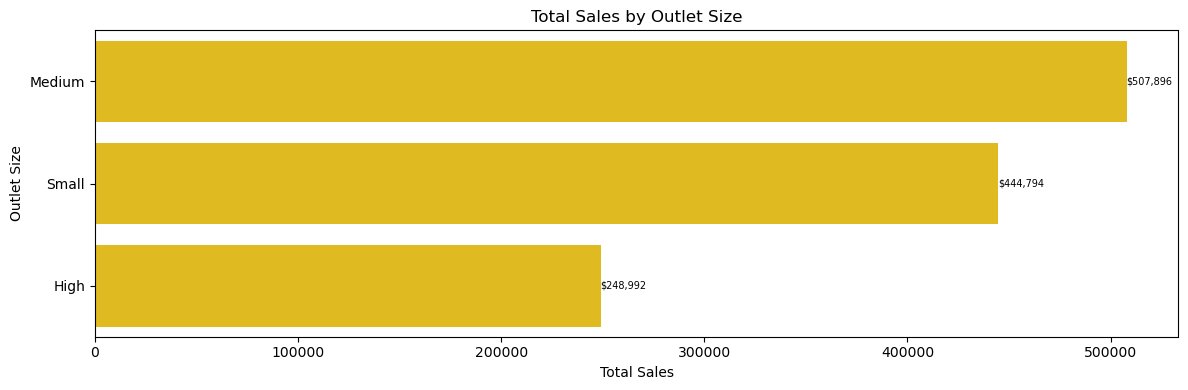

In [76]:
sales_by_outlet_size  = df.groupby('Outlet Size')['Sales'].sum().reset_index()
sales_by_outlet_size = sales_by_outlet_size.sort_values('Sales', ascending=False)   

plt.figure(figsize=(12, 4))

ax = sns.barplot(x = 'Sales',y = 'Outlet Size', data = sales_by_outlet_size, color = '#ffcd00')

for index, value in enumerate(sales_by_outlet_size['Sales']):
    ax.text(value, index, f'${value:,.0f}', va='center', fontsize=7)


plt.xlabel('Total Sales')
plt.ylabel('Outlet Size')
plt.title('Total Sales by Outlet Size')

plt.tight_layout()
plt.show()




Distribution By Fat Content and Outlet Size

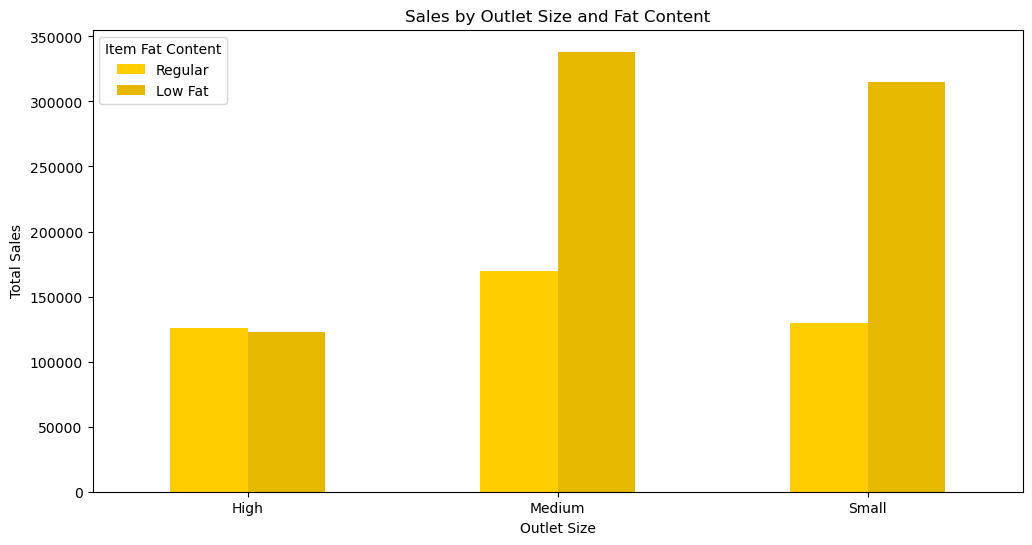

In [60]:
grouped = df.groupby(['Outlet Size','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

grouped.plot(kind='bar',figsize=(12, 6),color=['#ffcd00', '#e6b800'])
plt.title('Sales by Outlet Size and Fat Content')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()



Sales By Year

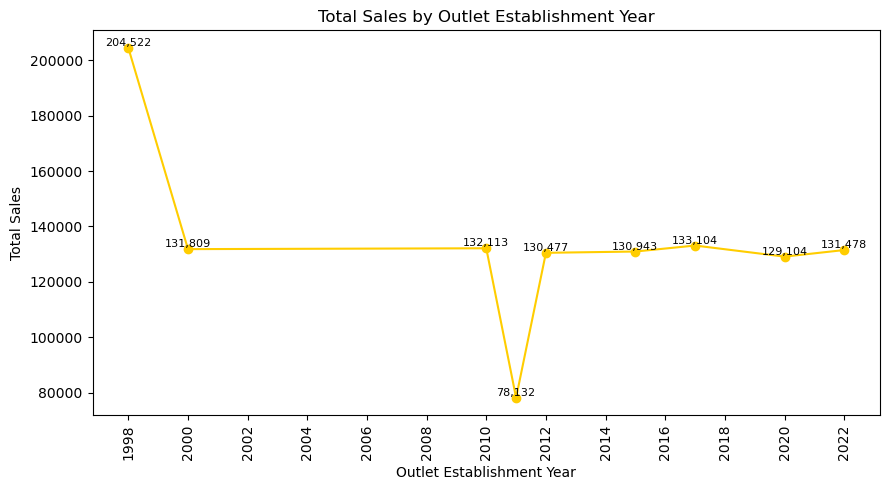

In [66]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))

plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color='#ffcd00')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

tick_range = np.arange(min(sales_by_year.index), max(sales_by_year.index)+1, 2)
plt.xticks(tick_range, rotation=90)

plt.tight_layout()
plt.show()

Total Sales by Outlet Type and Item Type


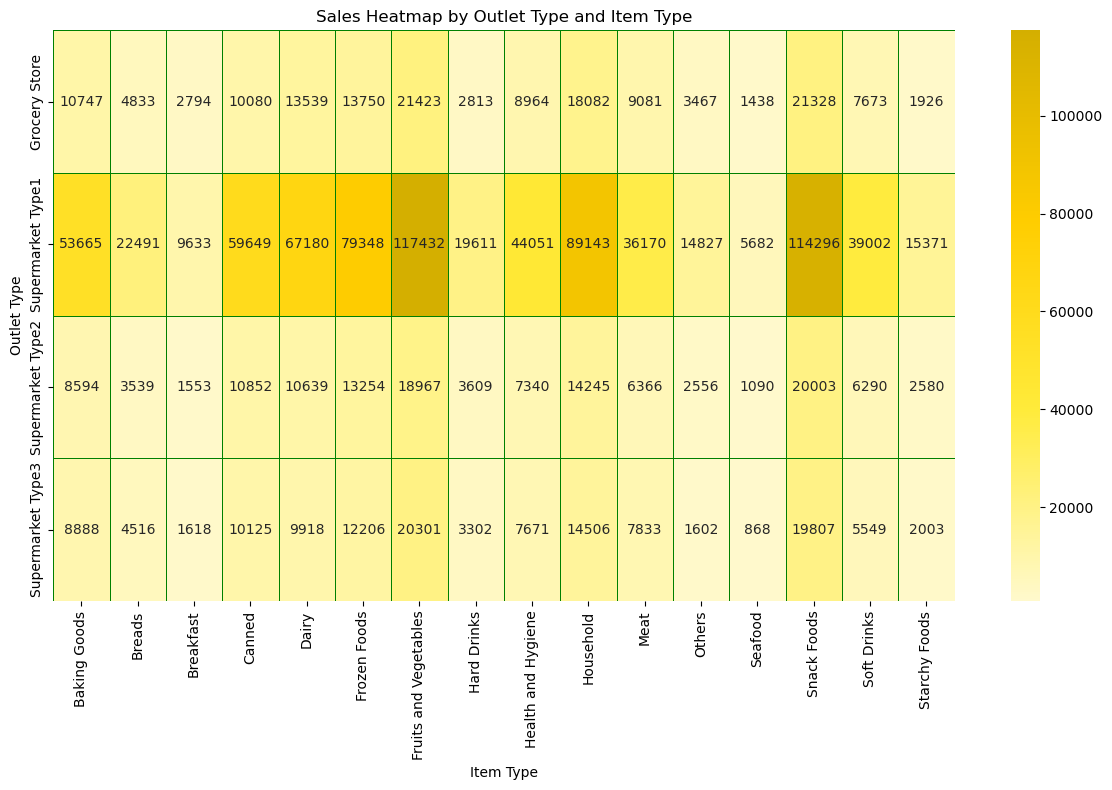

In [96]:
from matplotlib.colors import LinearSegmentedColormap

heatmap_data = df.groupby(['Outlet Type','Item Type'])['Sales'].sum().unstack()

plt.figure(figsize=(12, 8))

blinkit_cmap = LinearSegmentedColormap.from_list("blinkit_yellow", ['#fff9cc', '#ffeb3b', '#ffcd00', '#d4af00'])

sns.heatmap(heatmap_data,cmap=blinkit_cmap,annot = True,fmt = '.0f',linewidths=.5, linecolor='green')

plt.title('Sales Heatmap by Outlet Type and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Outlet Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



<Axes: xlabel='Outlet Age', ylabel='Sales'>

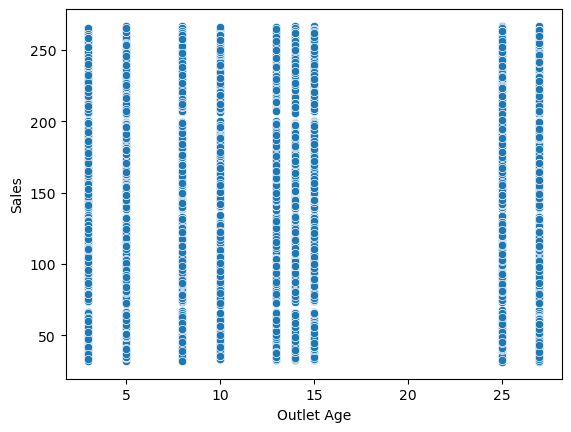

In [151]:
df['Outlet Age'] = 2025 - df['Outlet Establishment Year']
sns.scatterplot(x='Outlet Age', y='Sales', data=df)

In [152]:
df['Rating_Bucket'] = pd.cut(df['Rating'], bins=[0, 2, 3.5, 5], labels=['Low', 'Medium', 'High'])

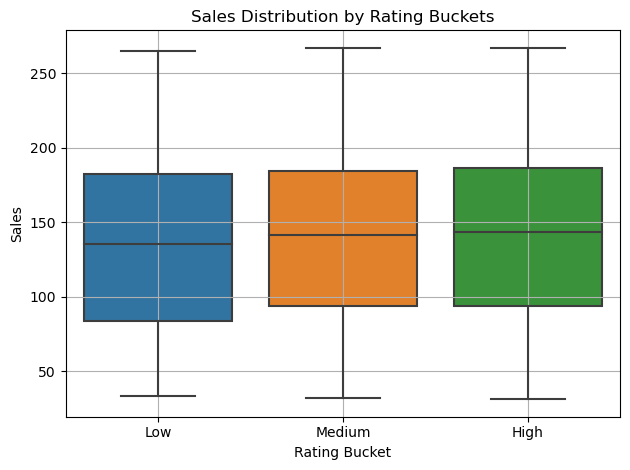

In [155]:
sns.boxplot(x='Rating_Bucket', y='Sales', data=df)

plt.title('Sales Distribution by Rating Buckets')
plt.xlabel('Rating Bucket')
plt.ylabel('Sales')
plt.tight_layout()
plt.grid(True)
plt.show()

In [156]:
print(df.groupby('Rating_Bucket')['Sales'].describe())

                count        mean        std      min       25%       50%  \
Rating_Bucket                                                               
Low             218.0  134.352004  64.255181  33.1558  83.70790  135.1074   
Medium          878.0  140.540210  61.154706  32.3558  94.06925  141.2983   
High           7427.0  141.241206  62.344670  31.2900  94.02780  143.3154   

                     75%       max  
Rating_Bucket                       
Low            182.40615  264.7568  
Medium         184.25290  266.5884  
High           186.02400  266.8884  


In [157]:
sales_by_rating = df.groupby('Rating_Bucket')['Sales'].sum().reset_index()

In [158]:
print(sales_by_rating)

  Rating_Bucket         Sales
0           Low  2.928874e+04
1        Medium  1.233943e+05
2          High  1.048998e+06


<Axes: xlabel='Item Identifier'>

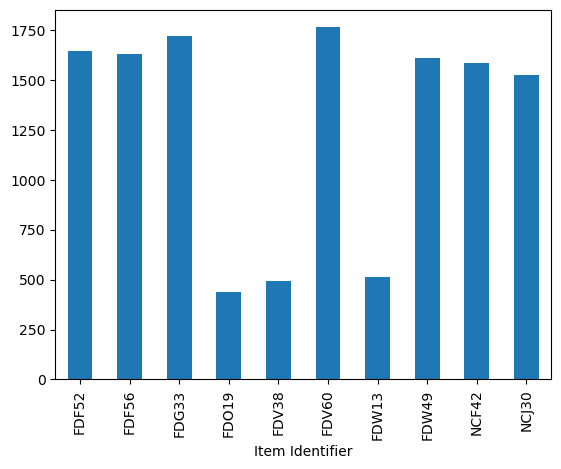

In [154]:
item_counts = df['Item Identifier'].value_counts()
top_items = item_counts.head(10).index

top_item_sales = df[df['Item Identifier'].isin(top_items)].groupby('Item Identifier')['Sales'].sum()
top_item_sales.plot(kind='bar')

Item Visibility & Sales Analysis


In [107]:
df[['Item Visibility','Sales']].corr()

,Item Visibility,Sales
Item Visibility,1.000000,-0.001315
Sales,-0.001315,1.000000


In [97]:
visibility_median = df['Item Visibility'].median()
sales_median = df['Sales'].median()

In [ ]:
def classify_quadrants(row):
    if row['Item Visibility'] > visibility_median and row['Sales'] > sales_median:
        return 'High Visility, High Sales (Star Products)'
    elif row['Item Visibility'] > visibility_median and row['Sales'] <= sales_median:
        return 'High Visibility, Low Sales (Over hyped Products)'
    elif row['Item Visibility'] <= visibility_median and row['Sales'] > sales_median:
        return 'Low Visibility, High Sales (Hidden Gems)'
    else:
        return 'Low Visibility, Low Sales (Underperformers)'
    
df['Quadrant'] = df.apply(classify_quadrants, axis=1)

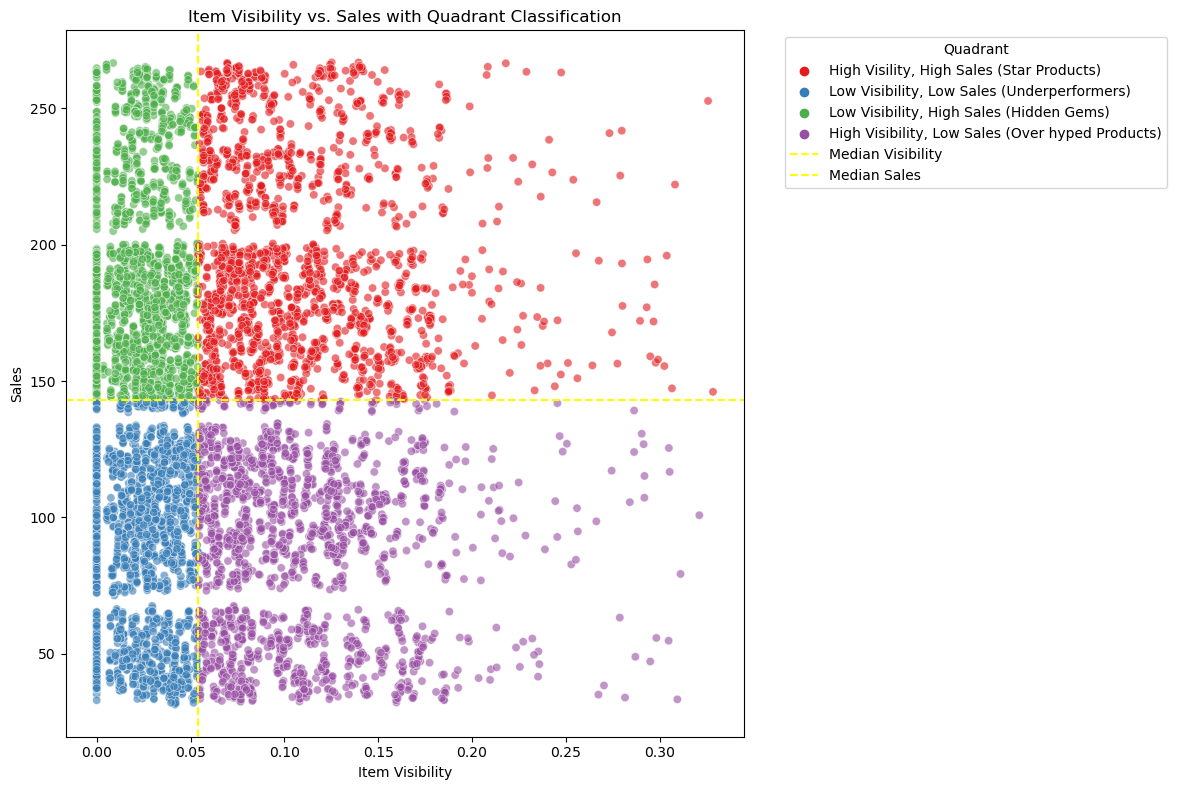

In [105]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data = df, x = 'Item Visibility', y = 'Sales', hue = 'Quadrant', palette = sns.color_palette("Set1", n_colors=4), alpha=0.6)

plt.axvline(x = visibility_median, color='yellow', linestyle='--', label='Median Visibility')
plt.axhline(y = sales_median, color='yellow', linestyle='--', label='Median Sales')

plt.title('Item Visibility vs. Sales with Quadrant Classification')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.legend(title='Quadrant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [106]:
df['Quadrant'].value_counts()

Low Visibility, Low Sales (Underperformers)         2174
High Visility, High Sales (Star Products)           2173
Low Visibility, High Sales (Hidden Gems)            2088
High Visibility, Low Sales (Over hyped Products)    2088
Name: Quadrant, dtype: int64

In [113]:
top_product_quadrant = df.groupby('Quadrant')['Sales'].idxmax()

top_products_per_quadrant = df.loc[top_product_quadrant,['Item Identifier', 'Item Type', 'Sales', 'Quadrant']]


In [114]:
top_products_per_quadrant = top_products_per_quadrant.sort_values(by='Sales', ascending=False)
print(top_products_per_quadrant)

     Item Identifier  Item Type     Sales  \
183            FDS13     Canned  266.8884   
559            FDK51      Dairy  266.6884   
3255           FDH27      Dairy  143.0128   
2375           NCF43  Household  142.9470   

                                              Quadrant  
183          High Visility, High Sales (Star Products)  
559           Low Visibility, High Sales (Hidden Gems)  
3255  High Visibility, Low Sales (Over hyped Products)  
2375       Low Visibility, Low Sales (Underperformers)  


In [144]:
top_5_per_quadrant = (
    df.groupby('Quadrant', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Sales'))
      [['Item Identifier', 'Item Type', 'Sales', 'Quadrant']]
)

In [146]:
from IPython.display import display

display(top_5_per_quadrant)

,Item Identifier,Item Type,Sales,Quadrant
3255,FDH27,Dairy,143.0128,"High Visibility, Low Sales (Over hyped Products)"
6448,FDD04,Dairy,142.9154,"High Visibility, Low Sales (Over hyped Products)"
3389,DRC49,Soft Drinks,142.9128,"High Visibility, Low Sales (Over hyped Products)"
2780,FDX32,Fruits and Vegetables,142.8786,"High Visibility, Low Sales (Over hyped Products)"
4063,FDS57,Snack Foods,142.8470,"High Visibility, Low Sales (Over hyped Products)"
183,FDS13,Canned,266.8884,"High Visility, High Sales (Star Products)"
3398,FDR25,Canned,266.8884,"High Visility, High Sales (Star Products)"
1775,NCS29,Health and Hygiene,266.6884,"High Visility, High Sales (Star Products)"
3563,NCS29,Health and Hygiene,266.5884,"High Visility, High Sales (Star Products)"
5419,FDS13,Canned,266.5884,"High Visility, High Sales (Star Products)"


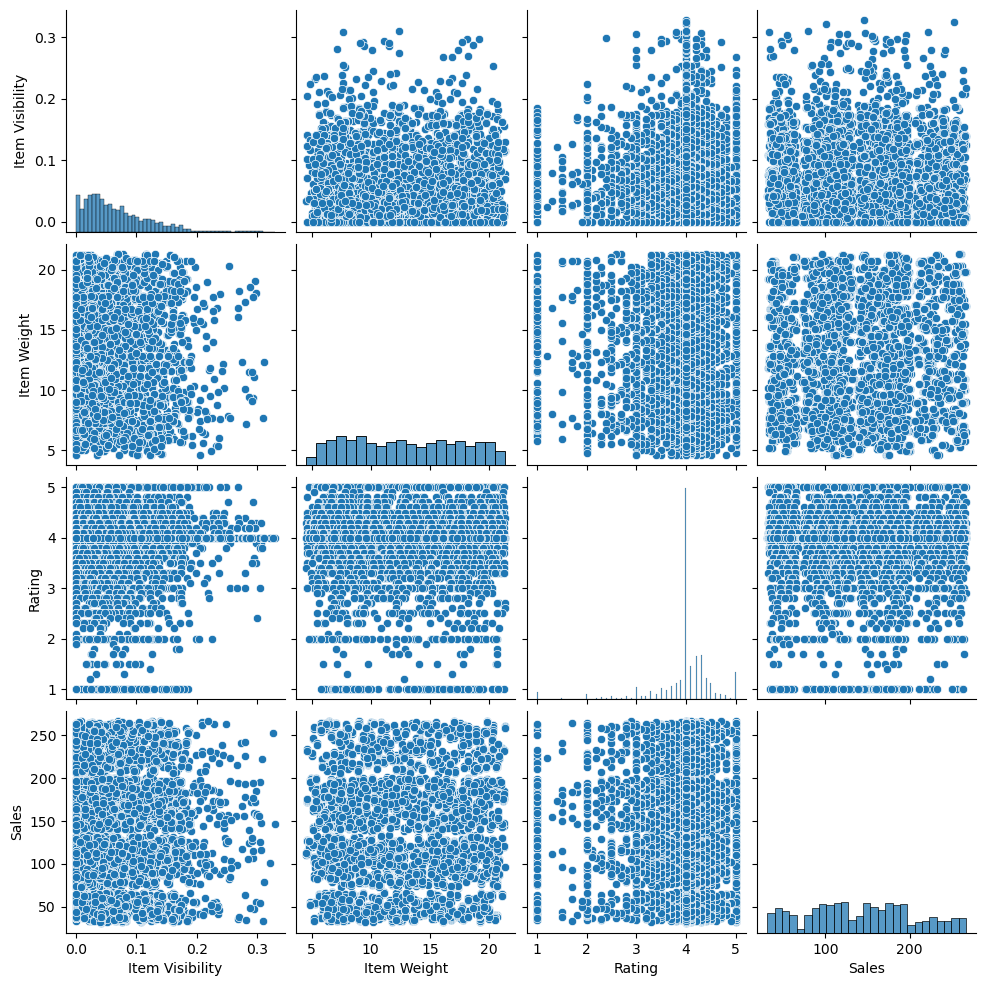

In [117]:
sns.pairplot(df[['Item Visibility', 'Item Weight', 'Rating','Sales']])

Building  a sales prediction model

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
df[['Item Visibility', 'Item Weight', 'Rating', 'Sales']].corr()

,Item Visibility,Item Weight,Rating,Sales
Item Visibility,1.000000,-0.014048,0.000798,-0.001315
Item Weight,-0.014048,1.000000,0.002711,0.027141
Rating,0.000798,0.002711,1.000000,0.011329
Sales,-0.001315,0.027141,0.011329,1.000000


In [132]:
X = df[['Item Visibility','Rating','Item Weight','Item Type']]
Y = df['Sales']

In [133]:
categorical_features = ['Item Type']

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [135]:
rf_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [137]:
rf_model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Item Type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [138]:
y_predict = rf_model.predict(X_test)

In [140]:
r2 = r2_score(Y_test, y_predict)
rmse = np.sqrt(mean_squared_error(Y_test, y_predict))

In [141]:
print("Random Forest R² Score:", r2)
print("Random Forest RMSE:", rmse)

Random Forest R² Score: 0.5758256769910142
Random Forest RMSE: 40.991784091015006


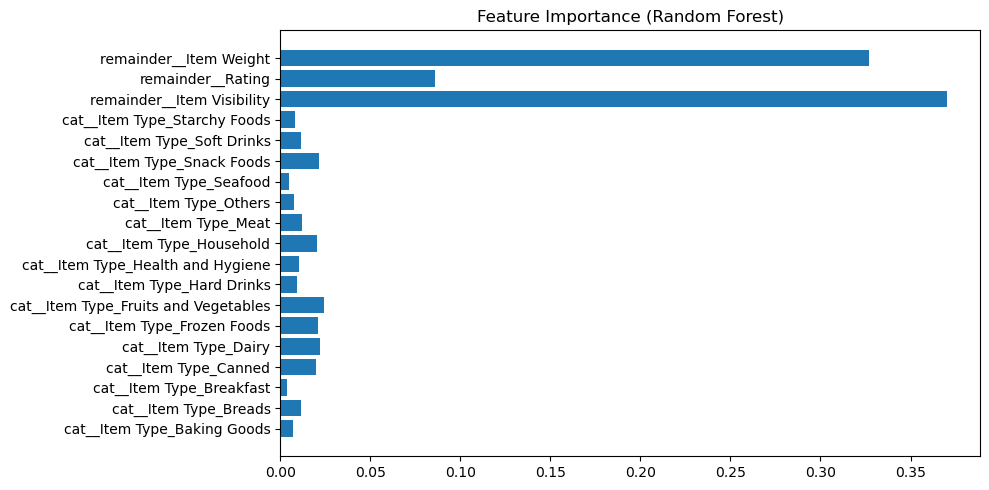

In [150]:
importances = rf_model.named_steps['regressor'].feature_importances_
features = rf_model.named_steps['preprocessing'].get_feature_names_out()

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [142]:
comparison_df = pd.DataFrame({
    'Actual Sales': Y_test.values,
    'Predicted Sales': y_predict
})

# Show top 10 results
print(comparison_df.head(10))

   Actual Sales  Predicted Sales
0      183.6634       180.877400
1      127.3362       130.988458
2      231.1668       205.438122
3      188.3898       157.251930
4      102.6332       108.849628
5       60.4194        80.008718
6       56.2930        76.418476
7       92.5436       101.460302
8      163.1236       165.777992
9      165.6500        94.211662


##  Project Wrap-up

Thank you for going through the Blinkit Sales Analysis Project.  
This notebook demonstrates how EDA, quadrant-based business logic, and machine learning can be combined to drive actionable insights in a retail setting.

📧 Connect with me on LinkedIn if you'd like to discuss the project!